# Frequency analysis - Zipf law

In this notebook we keep some scripts to analyse the word frequency tables outputted from processed text

In [11]:
import pandas as pd

file_path = "/mnt/c/Users/Matt/source/repos/Linguine/Linguine/bin/Debug/net8.0-windows10.0.19041.0/freqs.csv"  # Change this if needed
df = pd.read_csv(file_path)

df["Frequency"] = pd.to_numeric(df["Frequency"], errors="coerce")

df = df.sort_values(by="Frequency", ascending=False).reset_index(drop=True)

df["Rank"] = df.index + 1

df.head()

,Word,Frequency,Definition,Rank
0,the,405,A word placed before nouns to limit or individ...,1
1,a,271,"""An adjective, commonly called the indefinite ...",2
2,and,237,"""A particle which expresses the relation of co...",3
3,be,152,"""To exist actually, or in the world of fact; t...",4
4,to,150,"""The preposition to primarily indicates approa...",5


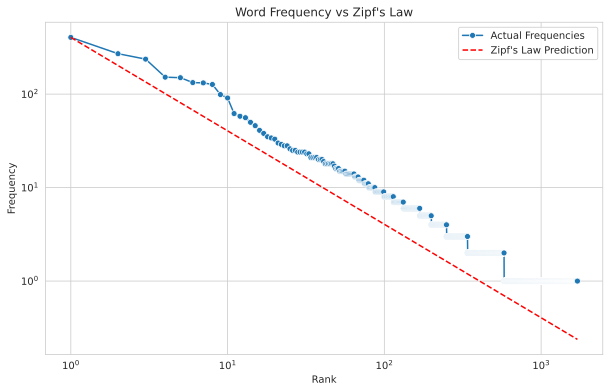

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'


# Generate Zipf's Law expected values (first word's frequency / rank)
zipf_freqs = df["Frequency"].iloc[0] / (df["Rank"])

# Plot actual frequencies vs Zipf's Law
plt.figure(figsize=(10, 6))
sns.lineplot(x=df["Rank"], y=df["Frequency"], label="Actual Frequencies", marker="o")
sns.lineplot(x=df["Rank"], y=zipf_freqs, label="Zipf's Law Prediction", linestyle="dashed", color="red")

# Log-log scale for better visualization
plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Word Frequency vs Zipf's Law")
plt.legend()

# Show plot
plt.show()


## Zipf-Mandelbrot

There is an extension to Zipf's law with fittable parameters, that this that

$$
\text{Frequency} = \frac{c}{(\text{rank} + b)^a}
$$

where $a,b,c$ are fittable parameters

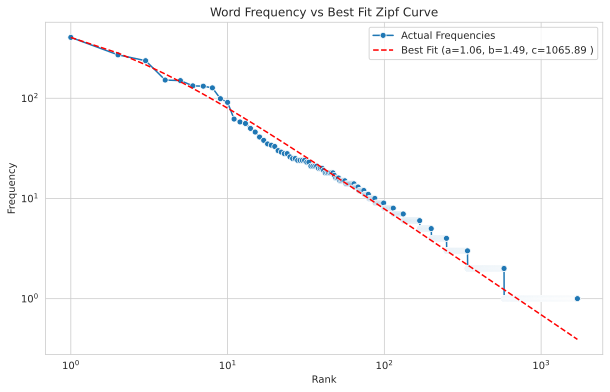

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load CSV
file_path = "/mnt/c/Users/Matt/source/repos/Linguine/Linguine/bin/Debug/net8.0-windows10.0.19041.0/freqs.csv" # Update path if needed
df = pd.read_csv(file_path)

# Ensure frequency column is numeric
df["Frequency"] = pd.to_numeric(df["Frequency"], errors="coerce")

# Sort by frequency (descending order)
df = df.sort_values(by="Frequency", ascending=False).reset_index(drop=True)

# Create rank column
df["Rank"] = df.index + 1

# Zipf-Mandelbrot
def zipf_func(rank, a, b, c):
    return c / ((rank + b) ** a)

# Fit the curve using non-linear least squares
popt, _ = curve_fit(zipf_func, df["Rank"], df["Frequency"], maxfev=10000)

# Get best-fit parameters
a_opt, b_opt, c_opt = popt

# Generate fitted Zipf-like values
df["Zipf_Fit"] = zipf_func(df["Rank"], a_opt, b_opt, c_opt)

# Plot actual frequencies vs Zipf's Law fit
plt.figure(figsize=(10, 6))
sns.lineplot(x=df["Rank"], y=df["Frequency"], label="Actual Frequencies", marker="o")
sns.lineplot(x=df["Rank"], y=df["Zipf_Fit"], label=f"Best Fit (a={a_opt:.2f}, b={b_opt:.2f}, c={c_opt:.2f} )", linestyle="dashed", color="red")

# Log-log scale for better visualization
plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Word Frequency vs Best Fit Zipf Curve")
plt.legend()

# Show plot
plt.show()
